# Predicting presence of a heart disease
<img src="img.jfif",width=60,height=60>

#### Objective: 
To predict if patient has presence of heart disease given his/her features

#### Task:
Classification task which specifies 1 if heart disease is present, else 0

#### Algorithm used: 
Logistic Regression

#### Evaluation metric:
Log loss

In [295]:
from IPython.display import Image
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression

### Data Pre-processing

In [296]:
df_traindata = pd.read_csv('data/01_raw/heart/train_values.csv')

In [297]:
df_trainlabel = pd.read_csv('data/01_raw/heart/train_labels.csv')

In [298]:
df_testdata = pd.read_csv('data/01_raw/heart/test_values.csv')

In [299]:
df_traindata.shape

(180, 14)

In [300]:
df_trainlabel.shape

(180, 2)

In [301]:
df_traindata.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [302]:
df_traindata.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [303]:
# Check distribution: to see if labels are evenly distribution
df_trainlabel['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

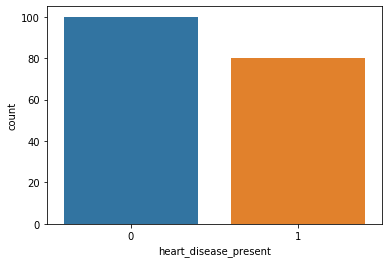

In [304]:
sns.countplot(x='heart_disease_present',data = df_trainlabel)

In [305]:
# data doesn't have missing value: as mentioned
pd.isnull(df_testdata)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [306]:
df_traindata['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [307]:
df_traindata = pd.get_dummies(df_traindata, columns=['thal'])

In [308]:
df_traindata.shape

(180, 16)

In [309]:
df_traindata = pd.merge(df_traindata, df_trainlabel, how= 'left',on='patient_id')

In [310]:
df_traindata.shape

(180, 17)

### Feature engineering

Tree based feature selection method is applied to see the importance of features in prediction task

Each feature is displayed with a score to depict its importance in modelling

In [311]:
# patient id can be removed as it is just an identifier for each unique record and not an important feature for the rpediction
df_traindata = df_traindata.drop(columns=['patient_id'])

In [312]:
df_traindata.shape

(180, 16)

In [313]:
df_trainlabel = df_traindata[['heart_disease_present']].copy()

In [314]:
df_traindata = df_traindata.drop(columns=['heart_disease_present'])

In [315]:
df_traindata.shape

(180, 15)

In [316]:
df_test = df_testdata.drop(columns=['patient_id'])

In [317]:
df_test = pd.get_dummies(df_test, columns=['thal'])

In [318]:
df_test.shape

(90, 15)

In [319]:
Rtree_clf = RandomForestClassifier()
Rtree_clf = Rtree_clf.fit(df_traindata,df_trainlabel)
model = SelectFromModel(Rtree_clf, prefit=True)
RF_tree_featuresTrain=df_traindata.loc[:, model.get_support()]
RF_tree_featuresTest = df_test.loc[:, model.get_support()]
print(RF_tree_featuresTrain.shape)


(180, 9)


In [320]:
# print feature and its importance
importances = Rtree_clf.feature_importances_
names = RF_tree_featuresTrain.columns
a = sorted(zip(map(lambda x: round(x, 5), importances), names), reverse=True)
a = pd.DataFrame(a)
print(a)

         0                            1
0  0.10417                  thal_normal
1  0.09233              chest_pain_type
2  0.07891      exercise_induced_angina
3  0.06905  serum_cholesterol_mg_per_dl
4  0.06080     oldpeak_eq_st_depression
5  0.05203       resting_blood_pressure
6  0.02549      max_heart_rate_achieved
7  0.02273       thal_reversible_defect
8  0.00582                          age


In [321]:
# Random Forest Feature Importance
for name, importance in zip(df_traindata, Rtree_clf.feature_importances_):
     print(name, "=", importance)
importances = Rtree_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rtree_clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
indices.shape
indices = indices[:15]
# Prints feature ranking
print("Feature ranking:")
for f in range(15):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

slope_of_peak_exercise_st_segment = 0.052032438574070305
resting_blood_pressure = 0.09232659751056284
chest_pain_type = 0.06905200670892785
num_major_vessels = 0.060802481040854686
fasting_blood_sugar_gt_120_mg_per_dl = 0.0058228216590961775
resting_ekg_results = 0.025488938617100547
serum_cholesterol_mg_per_dl = 0.07890717548682638
oldpeak_eq_st_depression = 0.10417311468072354
sex = 0.022730985283414853
age = 0.08420296189166027
max_heart_rate_achieved = 0.12522301258433344
exercise_induced_angina = 0.06870948966111913
thal_fixed_defect = 0.0023166227513362614
thal_normal = 0.111245207748182
thal_reversible_defect = 0.09696614580179172
Feature ranking:
1. feature 10 (0.125223)
2. feature 13 (0.111245)
3. feature 7 (0.104173)
4. feature 14 (0.096966)
5. feature 1 (0.092327)
6. feature 9 (0.084203)
7. feature 6 (0.078907)
8. feature 2 (0.069052)
9. feature 11 (0.068709)
10. feature 3 (0.060802)
11. feature 0 (0.052032)
12. feature 5 (0.025489)
13. feature 8 (0.022731)
14. feature 4 (0.

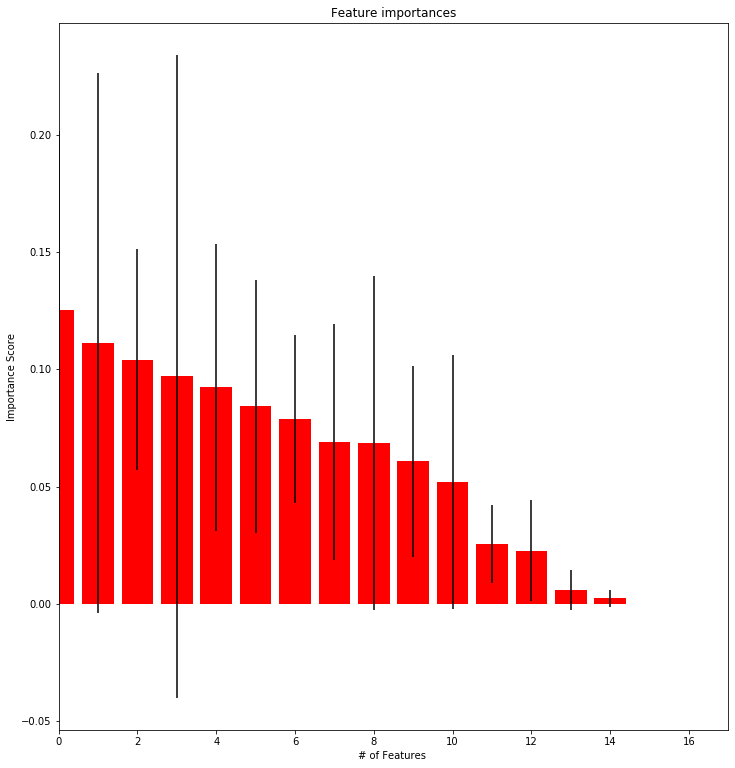

In [322]:
plt.figure(1, figsize=(12, 13))
plt.title("Feature importances")
plt.xlabel("# of Features ")
plt.ylabel("Importance Score")
plt.bar(range(15), importances[indices],color="r", yerr=std[indices], align="center")
plt.xlim([0, 17])
plt.show()
plt.show()


### Insights

1. Most important features: thal_normal, chest_pain_type

2. Importance score plotted shows how important the features are. 

All the features are taken into consideration as they have significant score: Hence, we continue with 15 features

### Modelling

1. Split the train set into train, validation set for checking the model performance on new data
2. Keep final test data to predict probability at the end

In [323]:
x_train, x_test, y_train, y_test = train_test_split(df_traindata,df_trainlabel,test_size=0.10, random_state=42)


### Brute Force Method: 
All the Naive algorithms are applied to see how data performs with each of them, having accuracy as a measure to compare

##### Naive approach is applied to narrow down our approach direction

In [341]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(),
    GaussianNB(),
    LogisticRegression()
    ]

In [325]:
# Naive Train Accuracy
algo = []
scores = []
for clf in classifiers:
    algo.append(clf.__class__.__name__)
    scores.append(cross_val_score(clf,x_train,y_train, cv=5).mean())
Naivescore_df_Train = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
Naivescore_df_Train

,Score
Algorithm,
DecisionTreeClassifier,0.728409
RandomForestClassifier,0.753598
KNeighborsClassifier,0.574621
SVC,0.833523
SVC,0.574053
GaussianNB,0.827083
LogisticRegression,0.851894


In [326]:
# Naive Test Accuracy
algo = []
scores = []
for clf in classifiers:
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    algo.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))
Naivescore_df_Test  = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')
Naivescore_df_Test

,Score
Algorithm,
DecisionTreeClassifier,0.666667
RandomForestClassifier,0.777778
KNeighborsClassifier,0.722222
SVC,0.833333
SVC,0.444444
GaussianNB,0.833333
LogisticRegression,0.833333


### Choosing a final algorithm for modelling: Logistic Regression

#### Evaluation Metrics: Log loss

<img src="logloss.JPG",width=20, height=20>

NOTE: Lower the log loss, more accurate the results are

In [327]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [328]:
y_pred = logreg.predict(x_test)
y_pred_prob = logreg.predict_proba(x_test)

In [329]:
log_loss(y_test, y_pred_prob)

0.3786513264684979

#### Confusion Matrix 


[[8 0]
 [3 7]]


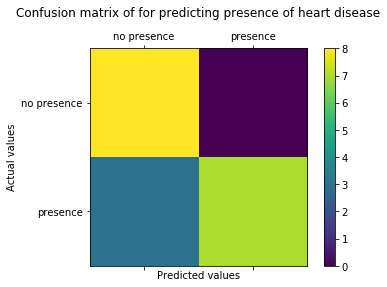

In [330]:
labels = ['no presence','presence']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of for predicting presence of heart disease\n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

### Deployment

Apply final model and predict values for test data and submit values

In [331]:
df_testdata.shape

(90, 14)

In [332]:
final_test = df_testdata.drop(columns=['patient_id'])

In [333]:
final_test = pd.get_dummies(final_test, columns=['thal'])

In [334]:
final_test.shape

(90, 15)

In [335]:
y_pred_prob_final = logreg.predict_proba(final_test)

In [336]:
# convert to submission format 
final_prob = pd.DataFrame(y_pred_prob_final)

In [337]:
final_prob.columns = ['No','heart_disease_present']

In [338]:
df_testdata['heart_disease_present'] = final_prob['heart_disease_present']

In [339]:
final_data_submit = df_testdata[['patient_id','heart_disease_present']].copy()

In [340]:
final_data_submit.to_csv('data/01_raw/heart/test_submission.csv')